In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
import warnings

%matplotlib inline
sns.set()

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df_used = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [3]:
df_used2 = df_used.copy()

#filling in missing values
columns = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", "GRADES_9_12_G", "GRADES_ALL_G"]

#interpolate missing values
for column in columns:
    df_used2.loc[:, column].fillna(df_used2.loc[:, column].interpolate(), inplace=True)

## 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [6]:
df_used2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.456000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.456000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,1.005984e+06,1.111164e+07,8.922691e+05,4.913351e+06,5.306024e+06,1.114374e+07,5.792260e+06,3.324275e+06,5.004288e+05,...,59797.646113,59511.380027,50207.239276,4.810102e+05,2.286678e+05,7.478782e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.009158e+06,1.200155e+07,1.106788e+06,5.423675e+06,5.900909e+06,1.212433e+07,6.376549e+06,3.500830e+06,5.253843e+05,...,78406.899202,77123.573668,66309.867155,6.286622e+05,3.005815e+05,9.291585e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.973995e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.279618e+05,...,10117.250000,10252.000000,8951.000000,8.127325e+04,3.950675e+04,1.718665e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,7.540845e+05,6.351760e+06,5.165190e+05,3.119414e+06,2.650904e+06,6.499891e+06,3.318778e+06,1.910412e+06,3.415810e+05,...,38280.500000,38114.500000,33279.000000,3.097340e+05,1.472355e+05,4.591248e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.595024e+06,1.803650e+07,1.411794e+06,8.020633e+06,8.584803e+06,1.801704e+07,9.130766e+06,5.435244e+06,8.490842e+05,...,72310.250000,72598.250000,64920.500000,5.783400e+05,2.843505e+05,8.860948e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


The mean of TOTAL_EXPENDITURE is greater than the mean TOTAL_REVENUE, which implies that the schools are operating at a deficit.  However, the median TOTAL_REVENUE is greater than the median TOTAL_EXPENDITURE; it's probably best to judge on a case-by-case basis.

LOCAL_REVENUE and STATE_REVENUE are greater sources of income than FEDERAL_REVENUE by about one order of magnitude.

## 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

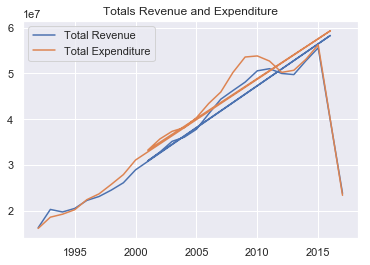

In [9]:
plt.plot(df_used2.loc[df_used2.STATE == "TEXAS", "YEAR"],
         df_used2.loc[df_used2.STATE == "TEXAS", "TOTAL_REVENUE"], label="Total Revenue")

plt.plot(df_used2.loc[df_used2.STATE == "TEXAS", "YEAR"],
         df_used2.loc[df_used2.STATE == "TEXAS", "TOTAL_EXPENDITURE"], label="Total Expenditure")

plt.title("Totals Revenue and Expenditure")
plt.legend()
plt.show()


Something odd is going on with the data- the line graph appears to show more than one data series from ~2002 onward, and in 2015 the values plummet.  (I am not sure what is going on or what to do about it!)

## 3. In your chosen state, [in] which of the lessons are the students more successful, math or reading?

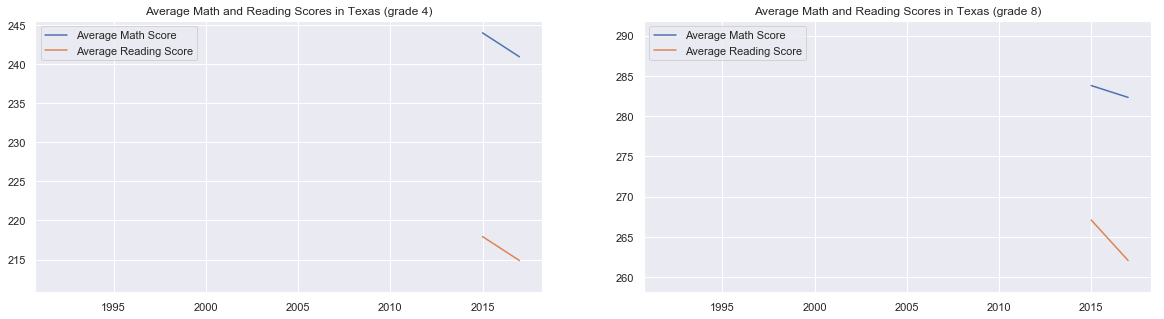

In [12]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(df_used2.loc[df_used2.STATE == "TEXAS", "YEAR"],
         df_used2.loc[df_used2.STATE == "TEXAS", "AVG_MATH_4_SCORE"], label="Average Math Score")

plt.plot(df_used2.loc[df_used2.STATE == "TEXAS", "YEAR"],
         df_used2.loc[df_used2.STATE == "TEXAS", "AVG_READING_4_SCORE"], label="Average Reading Score")

plt.title("Average Math and Reading Scores in Texas (grade 4)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(df_used2.loc[df_used2.STATE == "TEXAS", "YEAR"],
         df_used2.loc[df_used2.STATE == "TEXAS", "AVG_MATH_8_SCORE"], label="Average Math Score")

plt.plot(df_used2.loc[df_used2.STATE == "TEXAS", "YEAR"],
         df_used2.loc[df_used2.STATE == "TEXAS", "AVG_READING_8_SCORE"], label="Average Reading Score")

plt.title("Average Math and Reading Scores in Texas (grade 8)")
plt.legend()

plt.show()

Much of the data appear to be missing for this state, but the data that does exist shows higher math scores.

## 4. What are the distributions of the math and reading scores in the sample?

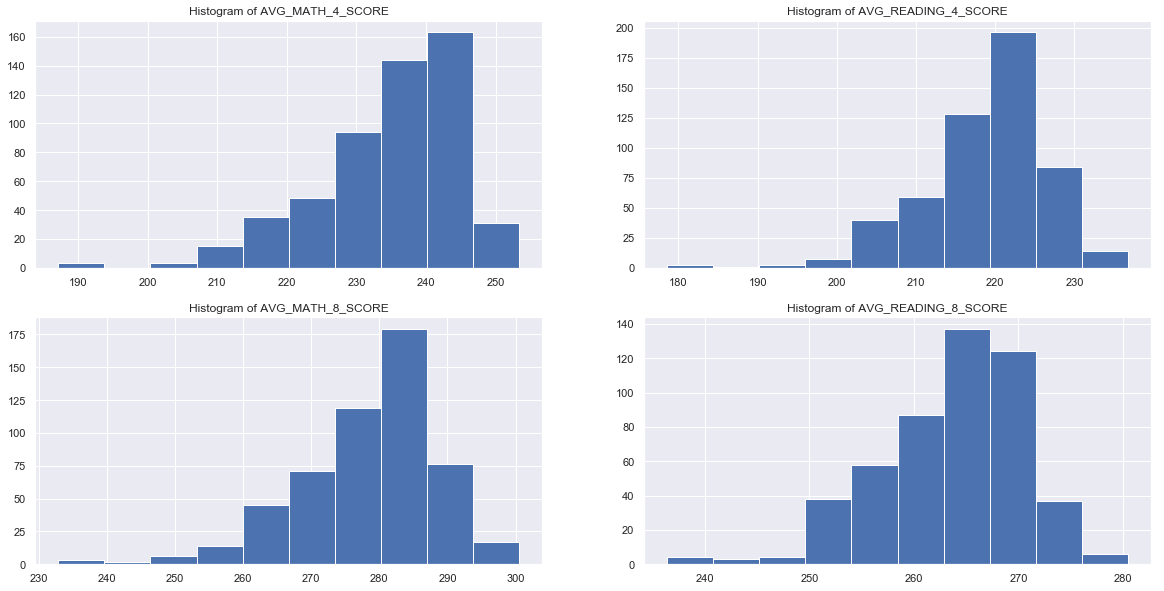

In [14]:
plt.figure(figsize=(20,10))


plt.subplot(2,2,1)
plt.hist(df_used2.AVG_MATH_4_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(df_used2.AVG_READING_4_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(df_used2.AVG_MATH_8_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_MATH_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(df_used2.AVG_READING_8_SCORE.dropna())
plt.title("Histogram of {}".format("AVG_READING_8_SCORE"))

plt.show()

The data are not normally distributed, but instead all groups skew left slightly.

## 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

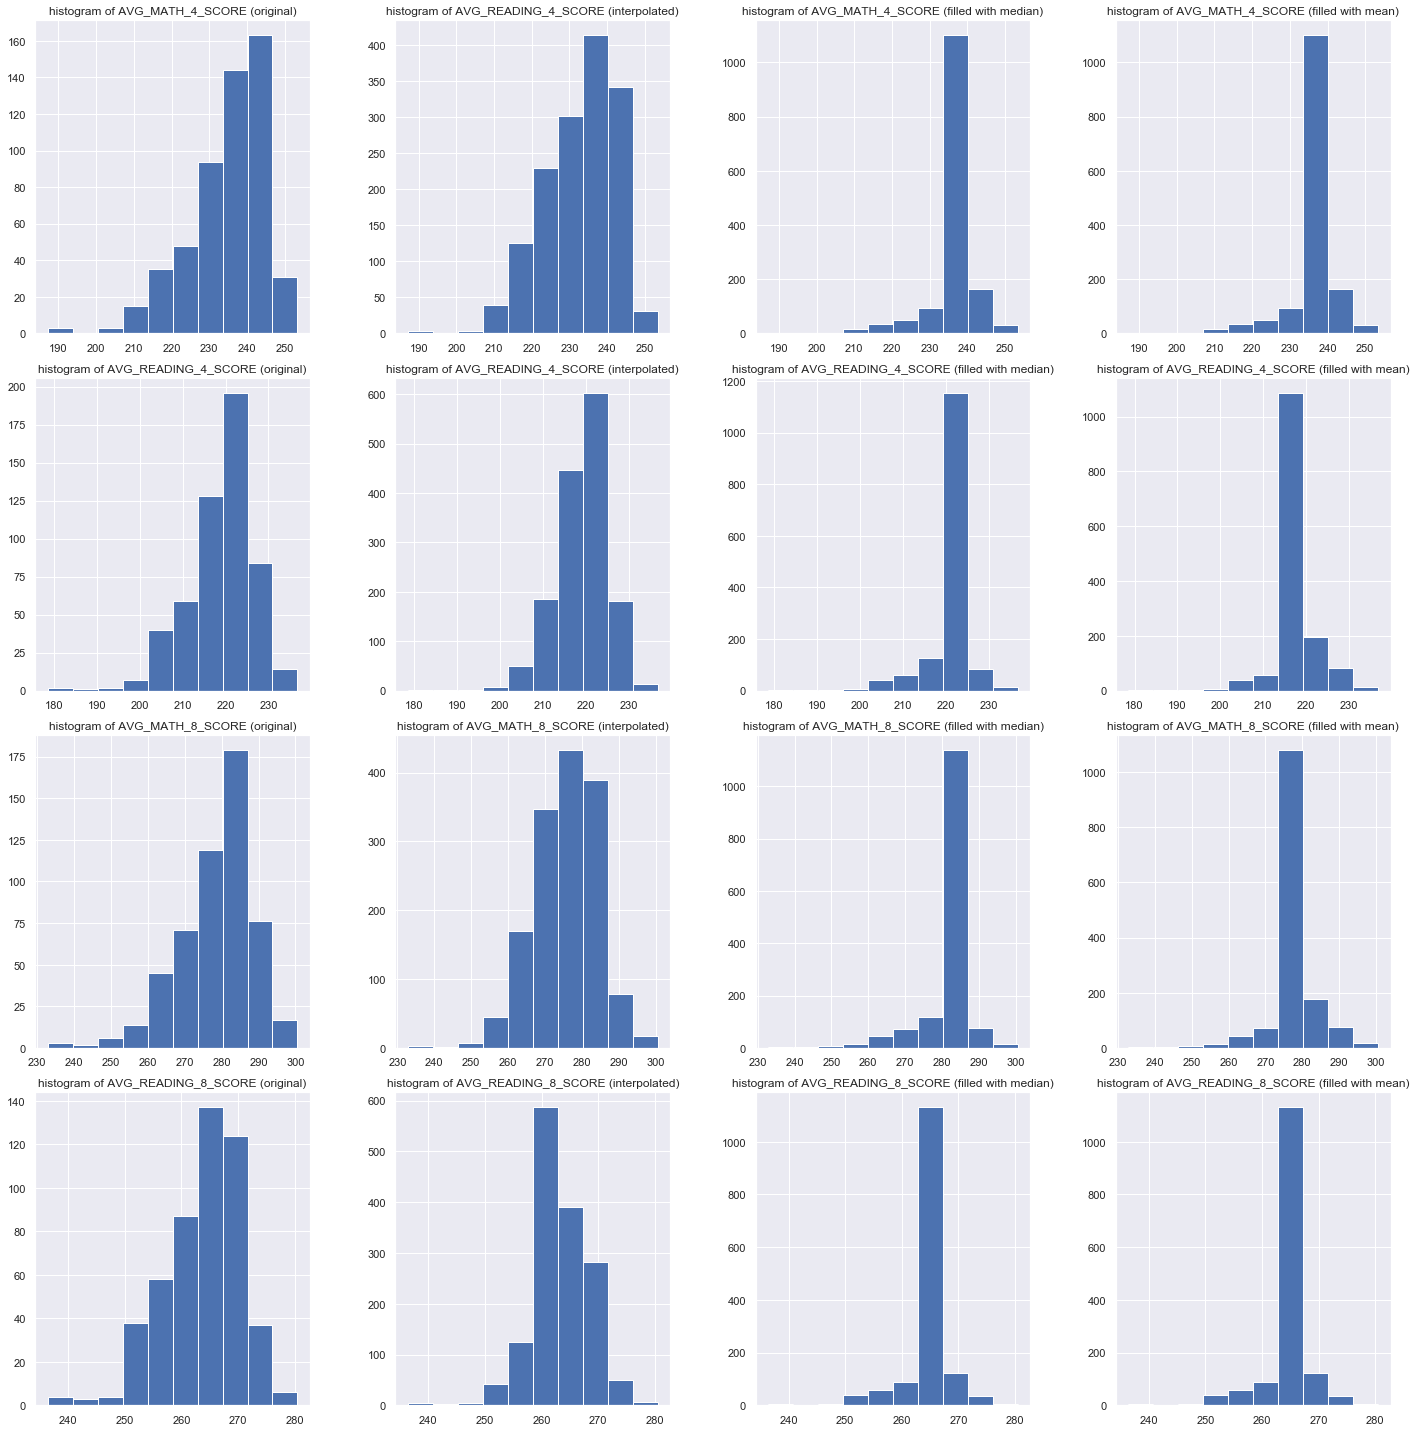

In [15]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(df_used2.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(df_used2.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(df_used2.AVG_MATH_4_SCORE.fillna(df_used2.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(df_used2.AVG_MATH_4_SCORE.fillna(df_used2.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))



plt.subplot(4,4,5)
plt.hist(df_used2.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(df_used2.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(df_used2.AVG_READING_4_SCORE.fillna(df_used2.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(df_used2.AVG_READING_4_SCORE.fillna(df_used2.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))



plt.subplot(4,4,9)
plt.hist(df_used2.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(df_used2.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(df_used2.AVG_MATH_8_SCORE.fillna(df_used2.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(df_used2.AVG_MATH_8_SCORE.fillna(df_used2.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))



plt.subplot(4,4,13)
plt.hist(df_used2.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(df_used2.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(df_used2.AVG_READING_8_SCORE.fillna(df_used2.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(df_used2.AVG_READING_8_SCORE.fillna(df_used2.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()

Filling in the missing data with mean or median values results in a strongly biased distribution.  The interpolation techniqe seems like a much more reasonable solution.